# Breast Cancer Wisconsin 

In [1]:
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = sklearn.datasets.load_breast_cancer()
X = data['data']
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## RandomForest

In [3]:
model_rf = RandomForestClassifier(n_estimators = 100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



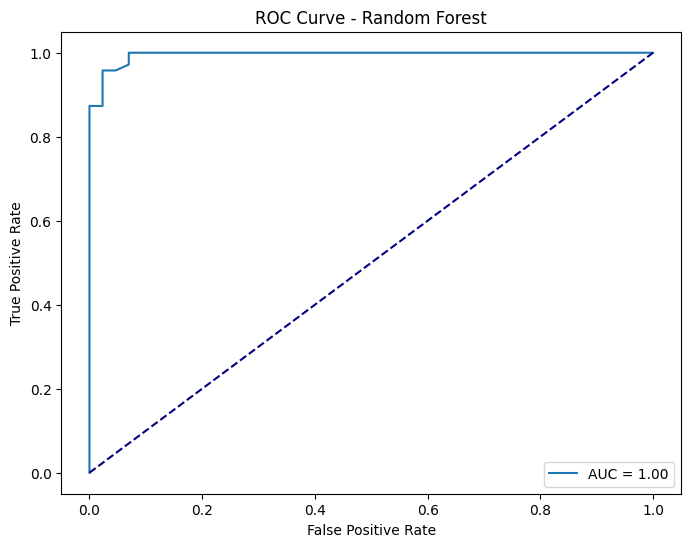

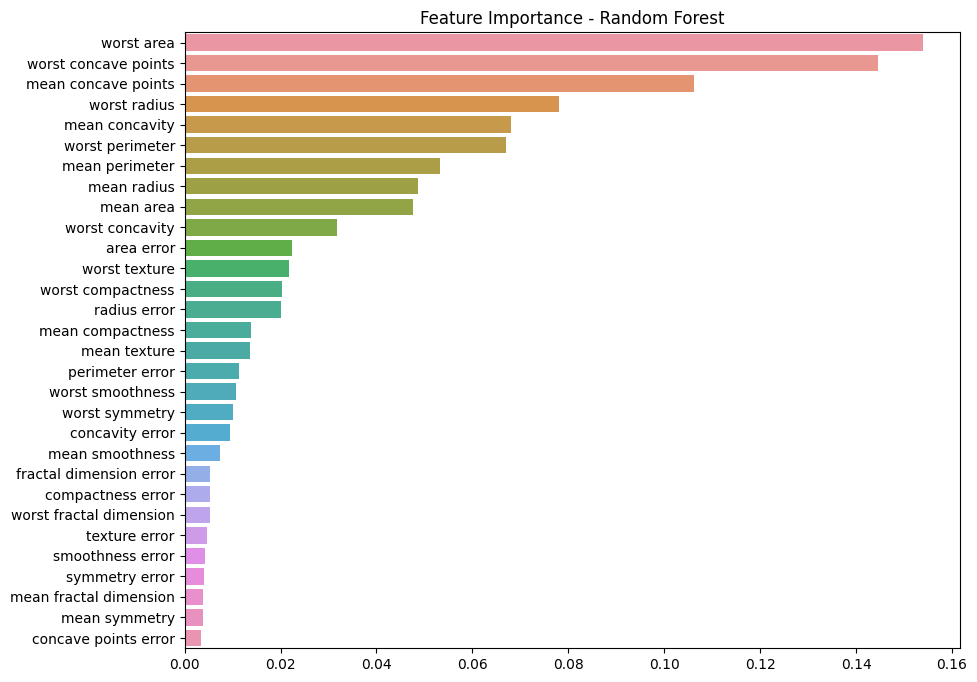

In [4]:
y_pred_proba = model_rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()

importances = model_rf.feature_importances_
indices = importances.argsort()[::-1]

plt.figure(figsize=(10,8))
sns.barplot(x=importances[indices], y=data['feature_names'][indices])
plt.title('Feature Importance - Random Forest')
plt.show()

## Gradient Boosting

In [5]:
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb)}")
print(classification_report(y_test, y_pred_gb))

Accuracy: 0.956140350877193
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



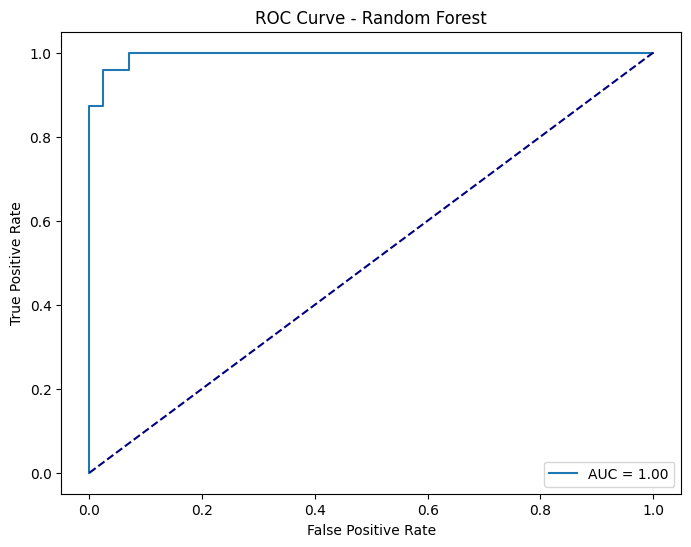

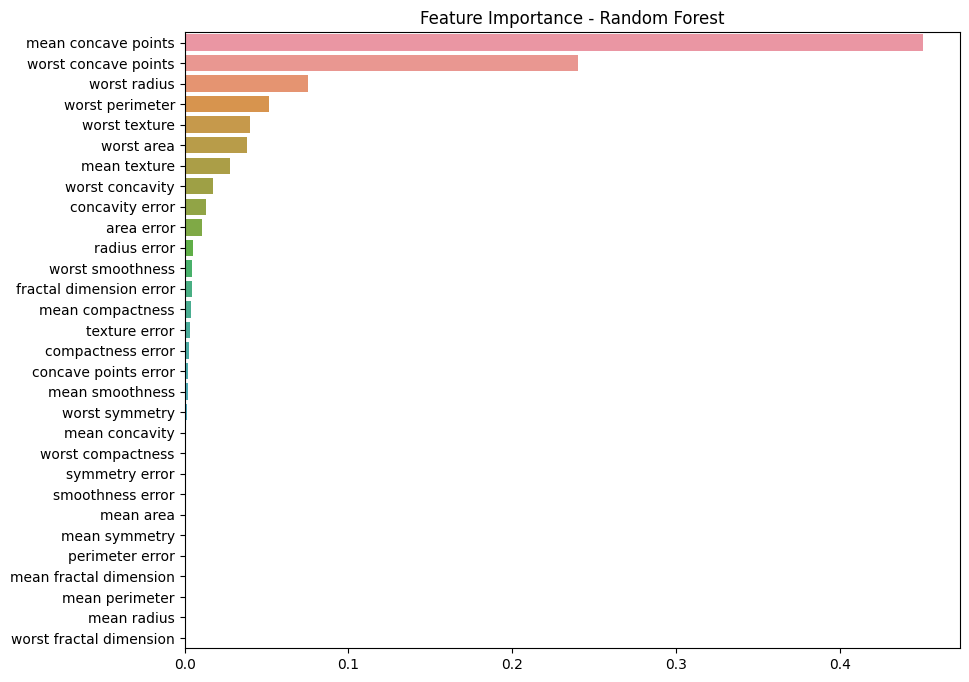

In [6]:
y_pred_proba = gb_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()

importances = gb_model.feature_importances_
indices = importances.argsort()[::-1]

plt.figure(figsize=(10,8))
sns.barplot(x=importances[indices], y=data['feature_names'][indices])
plt.title('Feature Importance - Random Forest')
plt.show()

## Кроссвалидация и подбор гиперпараметров

In [7]:
# Оценим модель с помощью кросс-валидации
cv_scores = cross_val_score(model_rf, X_train, y_train, cv=5)
print(f'Средняя точность на кросс-валидации: {cv_scores.mean():.4f}')
print('Точность на кросс-валидации: ', cv_scores)

Средняя точность на кросс-валидации: 0.9582
Точность на кросс-валидации:  [0.97802198 0.94505495 0.97802198 0.95604396 0.93406593]


In [8]:
# Определяем параметры для подбора
param_grid = {
    'n_estimators': [100, 200, 300],       # Количество деревьев
    'max_depth': [None, 10, 20, 30],       # Максимальная глубина дерева
    'min_samples_split': [2, 5, 10],       # Минимальное количество образцов для разделения
    'min_samples_leaf': [1, 2, 4],         # Минимальное количество образцов в листе
    'bootstrap': [True, False]             # Использовать выборку с возвращением
}
grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print(f'Лучшие параметры: {grid_search.best_params_}')

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.9s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300; tot

In [9]:
# Извлечение результатов
results = grid_search.cv_results_
type(results['param_max_depth'].data)

numpy.ndarray

In [10]:
results['param_min_samples_split']

masked_array(data=[2, 2, 2, 5, 5, 5, 10, 10, 10, 2, 2, 2, 5, 5, 5, 10, 10,
                   10, 2, 2, 2, 5, 5, 5, 10, 10, 10, 2, 2, 2, 5, 5, 5, 10,
                   10, 10, 2, 2, 2, 5, 5, 5, 10, 10, 10, 2, 2, 2, 5, 5, 5,
                   10, 10, 10, 2, 2, 2, 5, 5, 5, 10, 10, 10, 2, 2, 2, 5,
                   5, 5, 10, 10, 10, 2, 2, 2, 5, 5, 5, 10, 10, 10, 2, 2,
                   2, 5, 5, 5, 10, 10, 10, 2, 2, 2, 5, 5, 5, 10, 10, 10,
                   2, 2, 2, 5, 5, 5, 10, 10, 10, 2, 2, 2, 5, 5, 5, 10, 10,
                   10, 2, 2, 2, 5, 5, 5, 10, 10, 10, 2, 2, 2, 5, 5, 5, 10,
                   10, 10, 2, 2, 2, 5, 5, 5, 10, 10, 10, 2, 2, 2, 5, 5, 5,
                   10, 10, 10, 2, 2, 2, 5, 5, 5, 10, 10, 10, 2, 2, 2, 5,
                   5, 5, 10, 10, 10, 2, 2, 2, 5, 5, 5, 10, 10, 10, 2, 2,
                   2, 5, 5, 5, 10, 10, 10, 2, 2, 2, 5, 5, 5, 10, 10, 10,
                   2, 2, 2, 5, 5, 5, 10, 10, 10, 2, 2, 2, 5, 5, 5, 10, 10,
                   10],
             

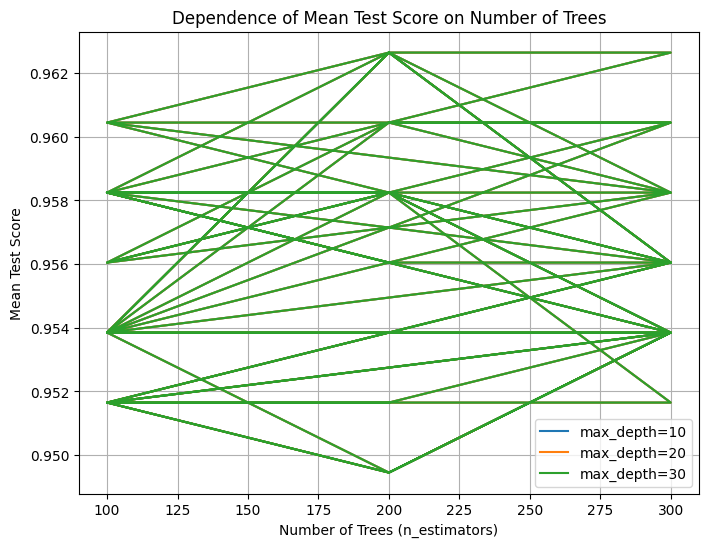

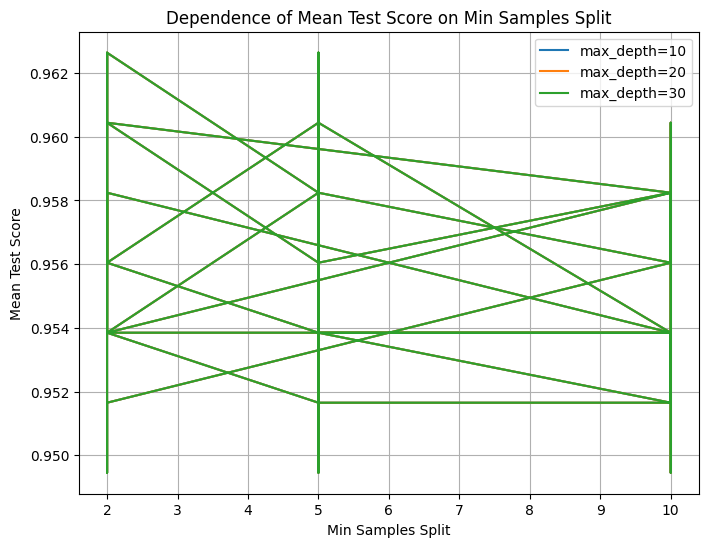

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Достаем нужные данные
mean_test_score = results['mean_test_score']
param_n_estimators = results['param_n_estimators'].data
param_max_depth = results['param_max_depth'].data
param_min_samples_split = results['param_min_samples_split'].data

# Исключим те записи, где max_depth или другие параметры равны None
valid_mask = np.array([depth is not None for depth in param_max_depth])

# Применим маску для фильтрации
param_n_estimators = param_n_estimators[valid_mask]
param_max_depth = param_max_depth[valid_mask]
param_min_samples_split = param_min_samples_split[valid_mask]
mean_test_score = mean_test_score[valid_mask]

# График зависимости метрики от числа деревьев
plt.figure(figsize=(8, 6))
for depth in np.unique(param_max_depth):
    mask = param_max_depth == depth
    plt.plot(param_n_estimators[mask], mean_test_score[mask], label=f'max_depth={depth}')

plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Mean Test Score')
plt.title('Dependence of Mean Test Score on Number of Trees')
plt.legend()
plt.grid(True)
plt.show()

# График зависимости метрики от min_samples_split
plt.figure(figsize=(8, 6))
for depth in np.unique(param_max_depth):
    mask = param_max_depth == depth
    plt.plot(param_min_samples_split[mask], mean_test_score[mask], label=f'max_depth={depth}')

plt.xlabel('Min Samples Split')
plt.ylabel('Mean Test Score')
plt.title('Dependence of Mean Test Score on Min Samples Split')
plt.legend()
plt.grid(True)
plt.show()
